# IMPORTING LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings('ignore')


# Importing data

In [6]:
df = pd.read_excel("E:/datasets/diabetes.xlsx")
#df=pd.DataFrame(data)

# EDA

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [67]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

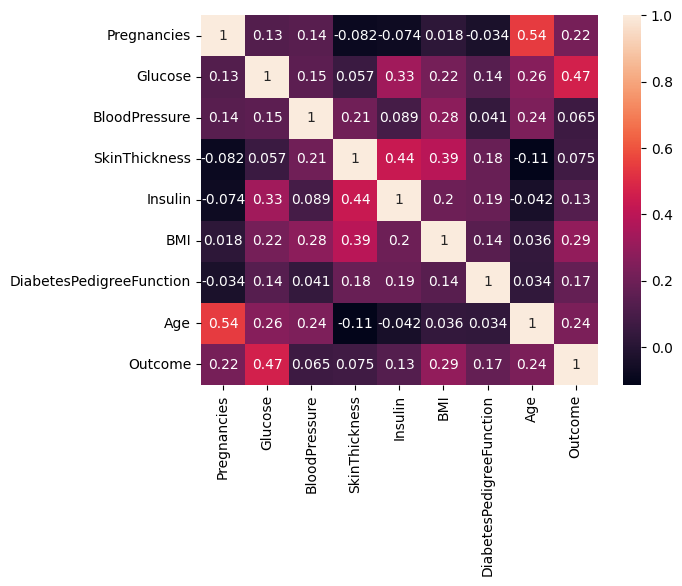

In [68]:
ax = sns.heatmap(df.corr(),annot = True)

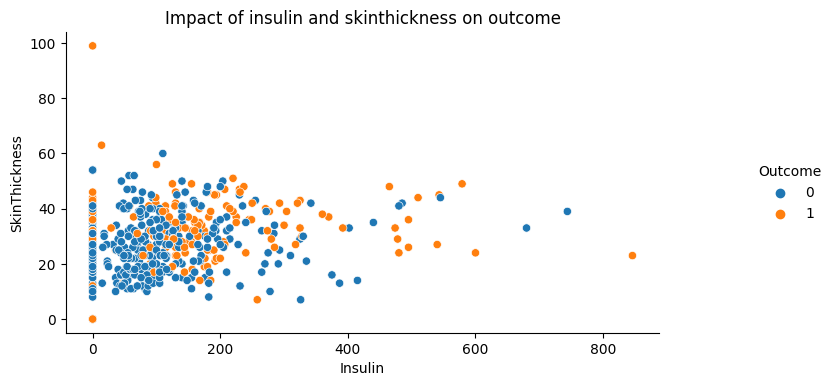

In [69]:
%matplotlib inline
g = sns.pairplot(data = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']],
             x_vars = ['Insulin'],y_vars = 'SkinThickness',aspect=1.5 ,hue='Outcome'
            )
g.fig.set_size_inches(9,4)

plt.title('Impact of insulin and skinthickness on outcome')
plt.show()

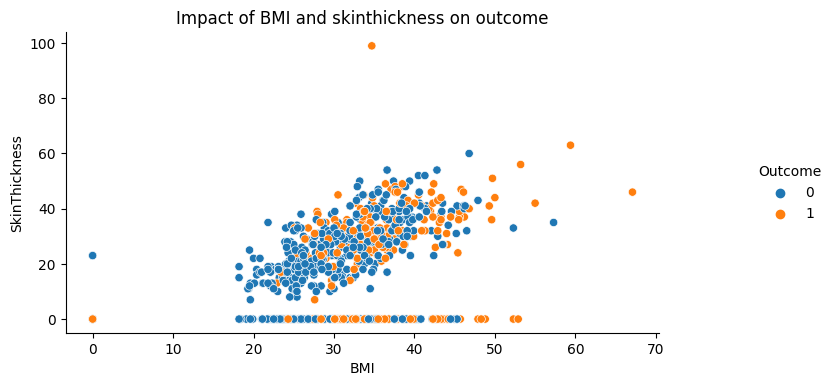

In [70]:
%matplotlib inline
g = sns.pairplot(data = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']],
             x_vars = ['BMI'],y_vars = 'SkinThickness',aspect=1.5 ,hue='Outcome'
            )
g.fig.set_size_inches(9,4)

plt.title('Impact of BMI and skinthickness on outcome')
plt.show()

In [71]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# REGRESSION MODEL

In [15]:
y= df['Outcome']

In [16]:
df.drop('Outcome',axis = 1 , inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
X= df

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [27]:
clf= LogisticRegression()#.fit(X_train,y_train)
clf.fit(X_train,y_train)


LogisticRegression()

In [29]:
print('Accuracy of logistic Regression classifier on training set:{:2f}'.format(clf.score(X_train,y_train)))
print('Accuracy of logistic Regression classifier on training set:{:2f}'.format(clf.score(X_test,y_test)))
y_predicted = clf.predict(X_test)
r2 = clf.score(X_test, y_test)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R-squared: {adj_r2:.2f}")
print(y_predicted)

Accuracy of logistic Regression classifier on training set:0.770833
Accuracy of logistic Regression classifier on training set:0.791667
Adjusted R-squared: 0.78
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


#compute and print confusion matrix
from sklearn.metrics import confusion_matrix

In [30]:

confusion = confusion_matrix(y_test, y_predicted)


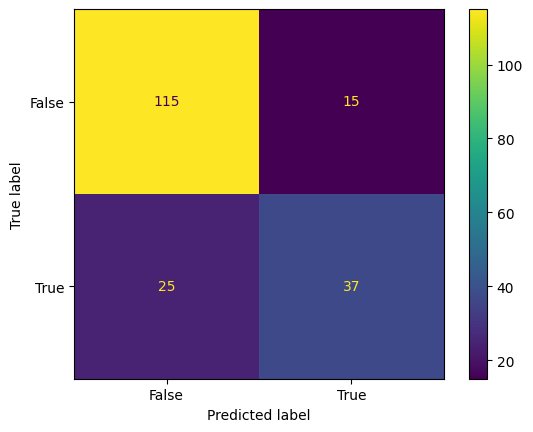

In [31]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.show()

In [32]:
print('Accuracy:{:2f}'.format(accuracy_score(y_test,y_predicted)))
print('Precision:{:2f}'.format(precision_score(y_test,y_predicted)))
print('Recall:{:2f}'.format(recall_score(y_test,y_predicted)))
print('F1:{:2f}'.format(f1_score(y_test,y_predicted)))

Accuracy:0.791667
Precision:0.711538
Recall:0.596774
F1:0.649123


In [33]:
#generate a classification report
report = classification_report(y_test,y_predicted)
print("Classiication report:")
print(report)

Classiication report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
acc_clf = round(clf.score(X_train,y_train)*100,2)
acc_clf

100.0

In [37]:
acc_clf = round(clf.score(X_test,y_test)*100,2)
acc_clf

71.88

In [7]:
df['Outcome'] = 1  # set all values in the 'Outcome' column to 1

In [8]:
X = df.drop('Insulin', axis=1)
y = df['Insulin']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
r2 = model.score(X_test, y_test)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R-squared: {adj_r2:.2f}")
print(y_predicted)

# Make predictions for new data
new_data = pd.DataFrame({'Pregnancies': [5], 'Glucose': [100], 'BloodPressure': [70], 'SkinThickness': [30], 'BMI': [25], 'DiabetesPedigreeFunction': [0.4], 'Age': [35], 'Outcome': [1]})
predictions = model.predict(new_data)

print(predictions)

Adjusted R-squared: 0.26
[276.27643071  97.25885328 -34.11053332 132.62485022  30.22176736
  33.14306347 164.35767522 179.25356511 151.53392988  67.60951264
 191.31934157 177.19519795  12.29971965  92.4574788   12.07744572
  86.49794336 219.28290469   8.00199489 109.6681976   79.63324142
 137.06250237  20.87776025  82.25741662  10.91934909  56.843553
 131.52389034  25.25284999 165.70507205  86.42696386   8.20629272
 114.17006823 140.83550597  63.9881171  167.53813043  71.74756007
  63.64808523 123.42095254  80.41046727 163.96547167 168.48614577
  90.51414985 -19.59828986  56.05474909 200.26596098 234.538855
 113.96519647 107.90384441 121.19845917 154.17066548  29.18423226
  23.87439189  90.07120031 162.75718395 149.41206626  78.88333902
 -59.45648241  70.59968756 -21.08887285  51.55467841  47.27179819
 181.99554794 123.79681637  38.157878    78.10165858  98.28408557
 136.28404774  52.37174524  20.30353599  -8.73428213  16.50685694
   6.78535884  25.01312003  72.17932862 107.30613277  7

In [9]:
# Predict the target variable for the test set
y_predicted = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_predicted)

print(mse)

8251.571854343603


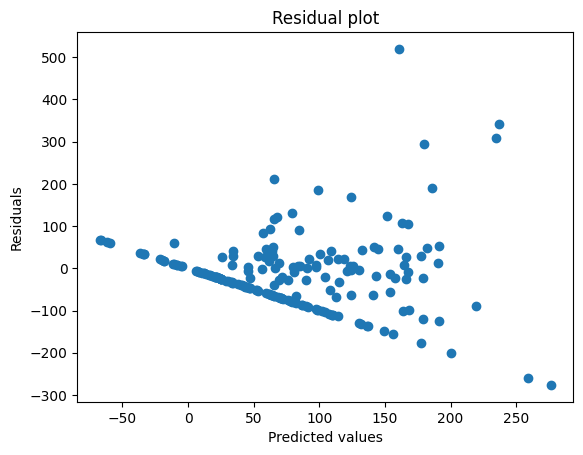

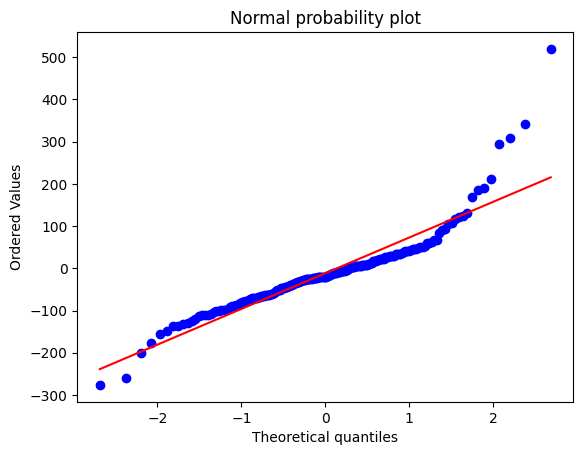

In [12]:

# Residual plot
residuals = y_test - y_predicted
plt.scatter(y_predicted, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Normal probability plot
stats.probplot(residuals, plot=plt)
plt.title('Normal probability plot')
plt.show()